# Исследование популярности компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

**Цель исследования** — выявить определяющие успешность игры закономерности. 

**Задачи:**

1. Обзор и предобработка данных
2. Исследовать зависимость продаж от различных критериев
3. Исследовать продажи в разных регионах в зависимости от различных критериев
4. Проверить статистические гипотезы

**Ход исследования:**

**1. Обзор и предобработка данных**

**2. Исследовательский анализ данных:**

* Оценка общих продаж компьютерных игр по платформам
* Иследование продаж компьютерных игр по платформам в разбивке по годам
* Исследование продаж компьютерных игр за актуальный период
* Исследование влияния отзывов пользователей и критиков на продажи внутри одной платформы
* Исследование продаж компьютерных игр в зависимости от жанра

**3. Составление портрета пользователя**

* Найти наиболее популярные платформы для пользователей разных регионов
* Найти наиболее популярные жанры для пользователей разных регионов
* Изучить влиение рейтинга ESRB на продажи в разных регионах

**4. Проверить гипотезы**

## Обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# чтение файла
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

**Приведение названия столбцов к нижнему регистру**

In [4]:
data = data.rename(str.lower, axis='columns')

In [5]:
# check
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Изменение типов данных**

В столбце `year_of_release` поменяем тип данных на *integer*, так как год не может иметь дробной части. Также в столбце `critic_score` тип данных поменяем на *integer*, так как оценки критиков являются целыми числами.

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')

In [7]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


**Обработка пропусков**

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

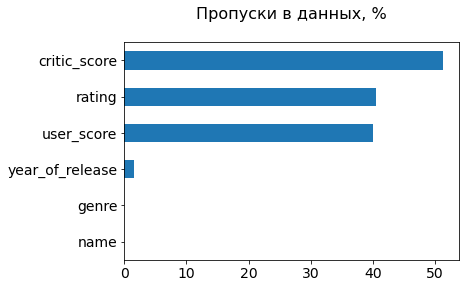

In [9]:
# построим столбчатую диаграмму, отражающую процент пропусков от общего числа данных
(
    (data.isna().mean()*100)
    .to_frame()
    .rename(columns={0: 'space'})
    .query('space > 0')
    .sort_values(by='space')
    .plot(kind='barh', legend=False, fontsize=14)
    .set_title('Пропуски в данных, %\n', fontsize=16)
);

Пропуски имеются в 6 столбцах. Наибольшее количество (более 50%) в столбце `critic_score`, в столбцах `reting` и `user_score` - около 40%, `year_of_release`, `genre` и `name` имеют менее 3% пропусков.

Пропуски в столбцах `genre` и `name` удалим, так как их количество минимально и пропуски значений идут вместе.

In [10]:
data = data[~data['name'].isna()]

Пропущенные значения в столбце `rating` заполним значением *no rating*.

In [11]:
data.loc[data['rating'].isna(), 'rating'] = 'no rating'

Стоит отметить, что есть игры, у которых для разных платформ рейтинг отличается, что может быть связано с особенностями реализации игры на платформе.

In [12]:
len(data[(data['user_score'].isna()) & (data['critic_score'].isna()) & (data['rating'] == 'no rating')])

6619

Почти все значения в столбцах `critic_score`, `user_score` и `rating`, возможно данные игры не заинтересовали аудиторию, либо их выход не был освещен на рынке перед выпуском и они остались незамечены. Также возможно произошла ошибка при выгрузке данных и данные подтянулись не полностью.

Оставим значения пропущенными.

В столбце `user_score`, помимо обычных оценок и пропусков, есть значение *'tbd'* (to be determined), то есть значения, которые должны быть определены в будущем. Заменим их на пустые значения.

In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Теперь можно изменить тип данных в столбце `user_score` на вещественный.

In [15]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [16]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

Пропущенные значения в столбце`year_of_release` оставим без изменения.

**Посчитаем суммарные продажи компьютерных игр во всех регионах**

In [17]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,no rating,31.38


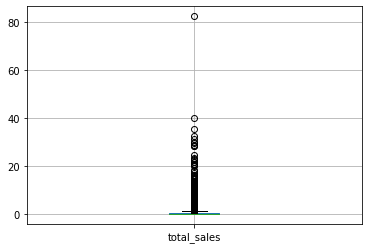

In [18]:
ax = data.boxplot(column='total_sales');

Большая часть суммарных продаж лежит в пределах 1 млн. Основная масса выбросов находится в пределах от 1 млн до 35 млн копий, также есть аномально высокие значения суммарных продаж 40 и 82 млн копий.

## Исследовательский анализ данных

### Оценка количества выпускаемых компьютерных игр по годам

In [19]:
year_of_release_stat = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_of_release_stat.columns = ['count']
year_of_release_stat

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


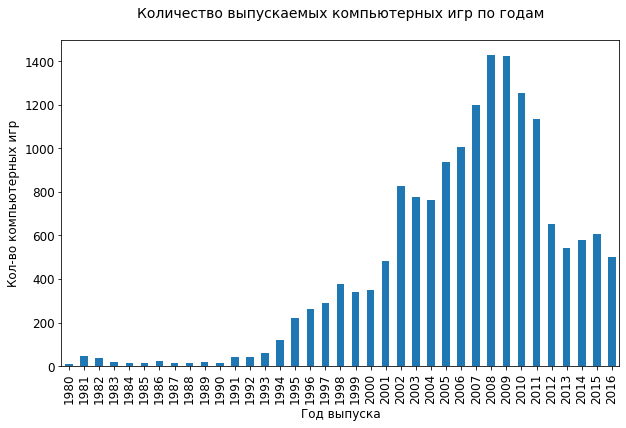

In [20]:
ax = year_of_release_stat.plot(kind='bar', figsize=(10,6), fontsize=12, legend=False)
ax.set_title('Количество выпускаемых компьютерных игр по годам\n', fontsize=14)
ax.set_xlabel('Год выпуска', fontsize=12)
ax.set_ylabel('Кол-во компьютерных игр', fontsize=12);

До 1995 года компьютерные игры выпускались в значительно меньшем количестве, после появления консоли PS количество начало игр расти. Далее будем рассматривать данные в период с 1995 года.

In [21]:
data = data[(data['year_of_release'] >= 1995) | (data['year_of_release'].isna())]

### Исследование продаж компьютерных игр по платформам

**Посмотрим, какие платформы имеют наибольшее количество продаж (рассмотрим топ 10).**

In [22]:
platform_sales_stat = (
                       data
                      .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                      .sort_values(by='total_sales', ascending=False)
)
platform_sales_stat.head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.10
PS,724.83
GBA,317.85
PS4,314.14
PSP,294.05


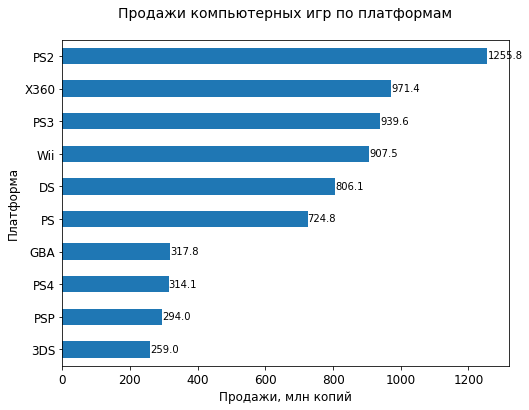

In [23]:
ax = platform_sales_stat[:10].sort_values(by='total_sales').plot(kind='barh', figsize=(8,6), fontsize=12, legend=False)
ax.set_title('Продажи компьютерных игр по платформам\n', fontsize=14)
ax.set_ylabel('Платформа', fontsize=12)
ax.set_xlabel('Продажи, млн копий', fontsize=12)
for i in ax.patches:
        ax.text(i.get_width() + .11, i.get_y() + .17, round(i.get_width(), 1));

**Вывод:**

Наибольшее количество игр за весь период было продано на платформе PS2 - 1200 копий. Около 1000 млн копий было продано на платформах X360, PS3 и Wii, на платформах PS4, GBA, PSP, 3DS и XB было продано менее 400 млн копий. Однако нужно учитывать, что какие-то платформы появились раньше и продаж соответственно будет больше.

**Посмотрим на распределение продаж компьютерных игр по годам для наиболее популярных платформ.**

In [24]:
def sales_on_platforms_by_years(data, list_of_platforms, func):
    platform_year_of_release_stat = (
    data
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc={'sum', 'count'})
    .reset_index()
    )
    for plaform_name in list_of_platforms:
        ax = (
            platform_year_of_release_stat[platform_year_of_release_stat['platform'] == plaform_name]
            .plot(x='year_of_release', y=func, kind='bar', legend=False)
        )
        ax.set_xlabel('Год выпуска', fontsize=12)
        ax.set_ylabel('Продажи, млн копий', fontsize=12)
        ax.set_title(f'Продажи компьютерных игр на платформе {plaform_name} по годам\n', fontsize=14);

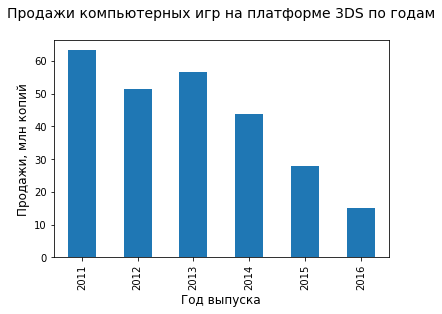

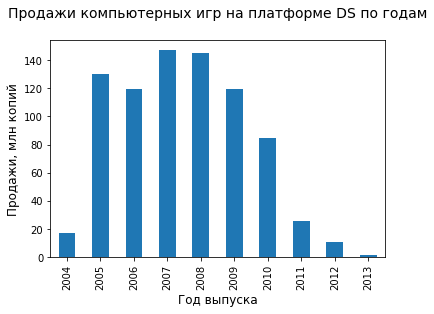

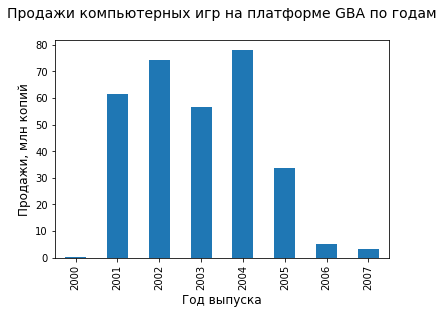

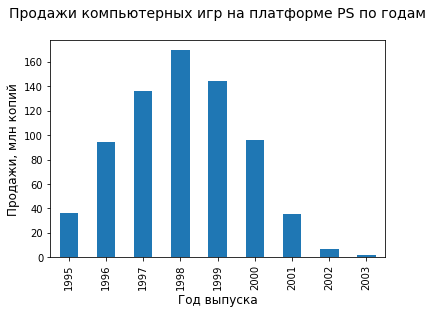

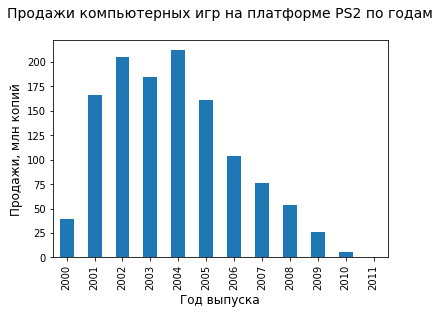

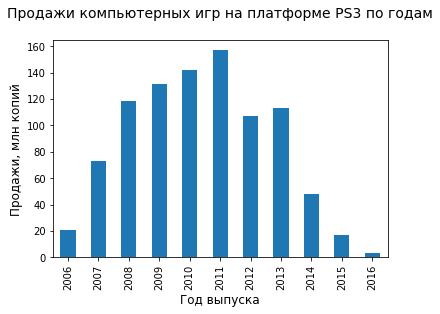

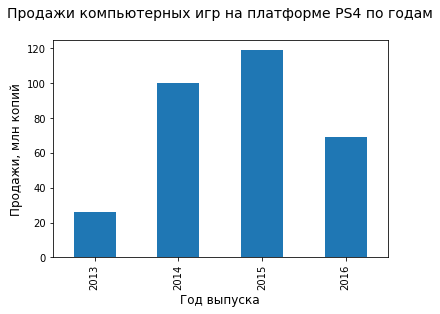

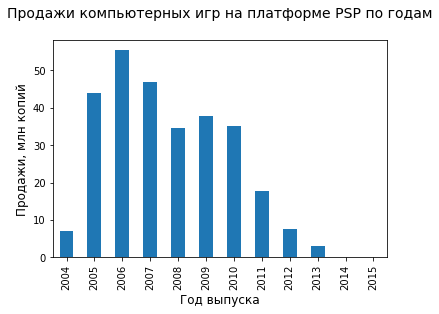

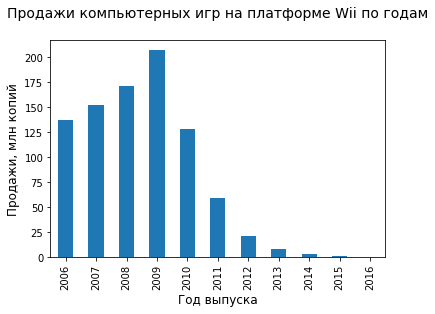

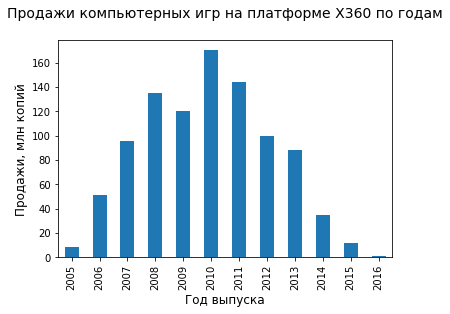

In [25]:
list_of_platforms = np.sort(platform_sales_stat.index[:10])
sales_on_platforms_by_years(data, list_of_platforms, func='sum')

**Вывод:**

Платформы достигают пик продаж за 3-5 лет после появления, пиковые значения для более популярных платформ находятся в интервале 140-200 млн проданных копий, у менее популярных эти значения находятся в диапазоне 60-80 млн копий. Затем продажи начинают резко идти на спад и через 4-8 лет прекращаются, так как на рынке возникают новые плаформы и вытесняют старые. 

По динамике продаж компьютерных игр на платформах PS - PS4 хорошо прослеживается, что в течение 3-4 лет после выхода новой версии платформы, производители компьютерных игр переставали выпускать новые релизы на старой платформе. После достижение пиковых значений продаж, высокие продажи сохраняются еще 3-4 года, далее идет резкий спад до значений менее 10 млн копий.

Для того, чтобы верно построить прогноз за 2017 год, оставим данные по платформам за последние 3 года (начиная с 2014 года) и у которых есть продажи на момент 2016 года, то есть платформы еще актуальны. Такой период позволит увидеть динамику продаж (например, идут ли они на спад и насколько быстро).

In [26]:
def actual_data(df, threshold):
    platform_last_year = (
        df
        .sort_values(by='year_of_release')
        .pivot_table(index='platform', values='year_of_release', aggfunc='last')
    )
    platform_list = platform_last_year[platform_last_year['year_of_release'] == 2016].index
    return df.query('(year_of_release >= @threshold or year_of_release.isna()) \
                    and platform in @platform_list').reset_index(drop=True)

In [27]:
data = actual_data(data, threshold=2014)

**Посмотрим, какие платформы лидируют по продажам за актуальный период.**

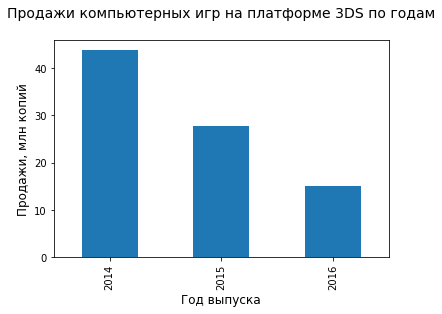

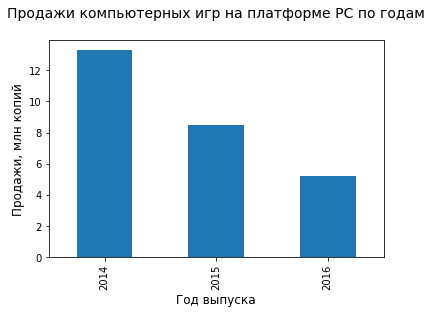

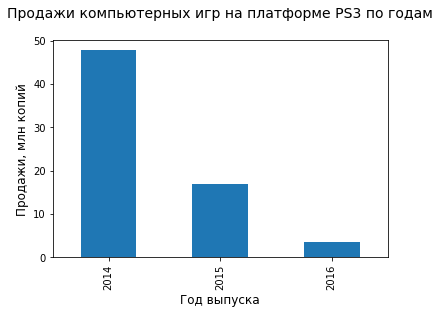

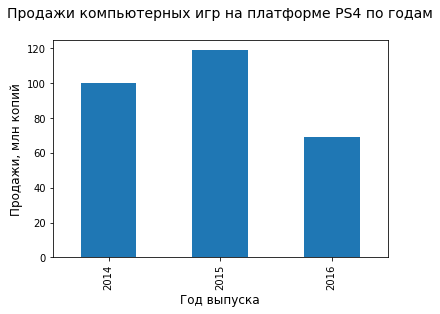

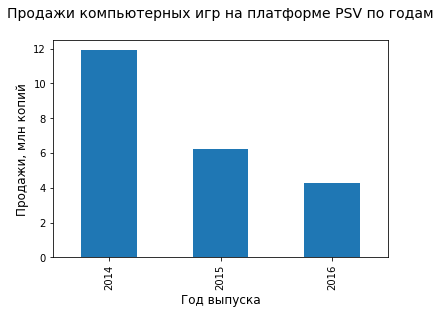

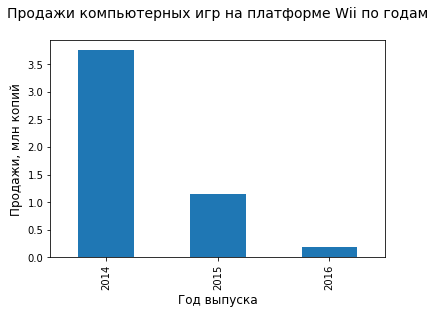

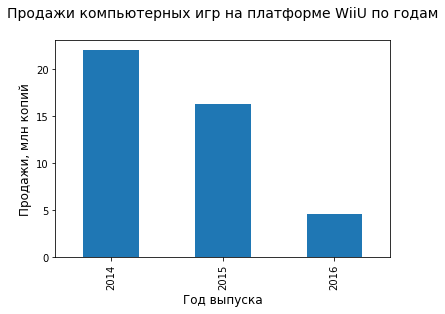

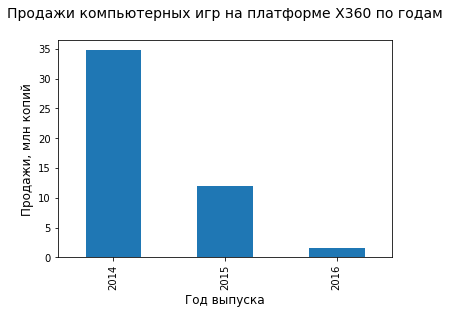

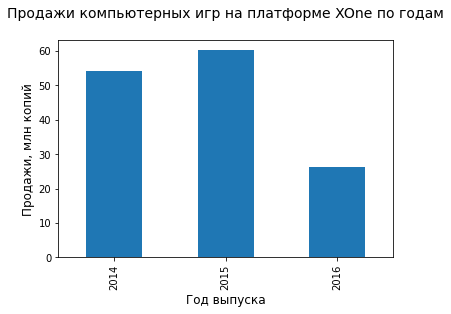

In [28]:
list_of_platforms = np.sort(data.platform.unique())
sales_on_platforms_by_years(data, list_of_platforms, func='sum')

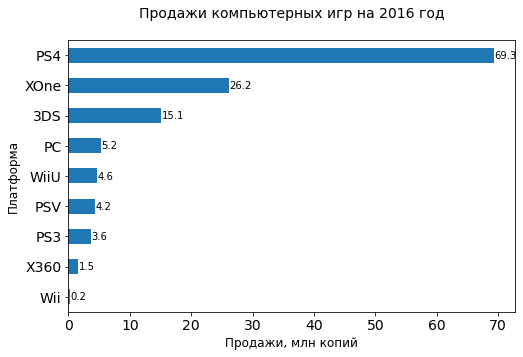

In [29]:
ax = (
    data[data['year_of_release'] == 2016]
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
    .plot(kind='barh', legend=False, fontsize=14, figsize=(8,5))
)
ax.set_xlabel('Продажи, млн копий', fontsize=12)
ax.set_ylabel('Платформа', fontsize=12)
ax.set_title('Продажи компьютерных игр на 2016 год\n', fontsize=14)
for i in ax.patches:
        ax.text(i.get_width() + .11, i.get_y() + .14, round(i.get_width(), 1));

**Вывод:**

На всех платформах виден спад по продажам за период 2014-2016гг.

Некоторые платформы все еще сохраняют высокие продажи, среди них лидирует PS4, у которой 69 млн проданных копий на 2016 год, также высокие продажи имеют XOne и 3DS (26 и 15 млн проданных копий), они являются потенциально прибыльными. На остальных платформах продаж менее 5,5 млн и с учетом того, как резко падают продажи на платформах, на следующий год продажи могут уменьшится в 2-3 раза или даже прекратиться.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

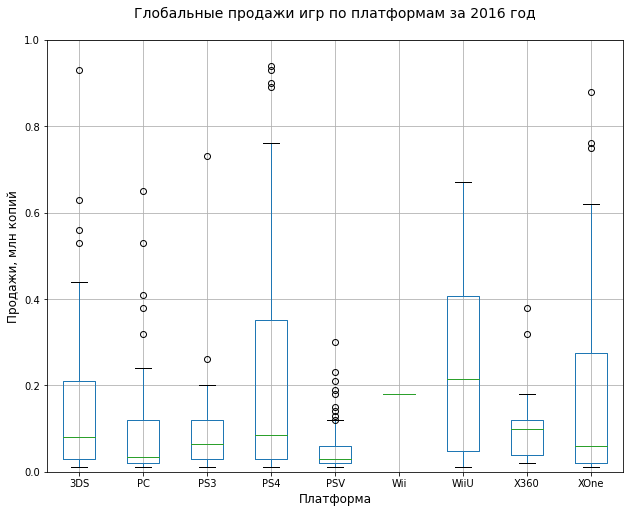

In [30]:
ax = data[data['year_of_release'] == 2016].boxplot(column='total_sales', by='platform', grid=True, figsize=(10,8))
ax.set_title('Глобальные продажи игр по платформам за 2016 год\n', fontsize=14)
plt.suptitle('')
ax.set_xlabel('Платформа', fontsize=12)
ax.set_ylabel('Продажи, млн копий', fontsize=12)
plt.ylim(0, 1);

У платформы WiiU медиана продаж выше, чем у остальных платформ, при этом есть незначительное количество выбросов (значения чуть выше 1 млн проданных копий), но в основном продажи стабильные. За ней идут PS4, XOne и 3DS, у которых медианы находятся примерно на одном уровне, но значение 75-го процентиля выше у платформы PS4. Платформы PS4, XOne и 3DS имеют выбросы, то есть некоторые игры на этих платформах были особенно популярны и имели аномально высокие продажи (значения находятся в диапазоне 2-7 млн проданных копий).

Продажи на платформах PC и PSV заметно меньше.

Таким образом, потенциально прибыльными можно назвать платформы WiiU, PS4, XOne, 3DS.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

Рассмотрим платформу PS4, у которой наибольшее количество продаж на 2016 год.

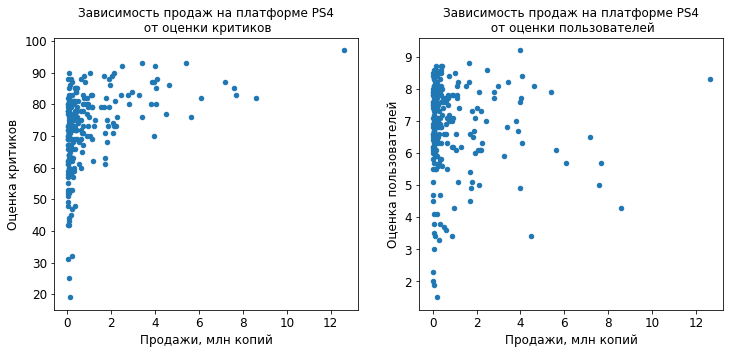

In [31]:
list_of_popular_platforms = ['PS4']
for platform in list_of_popular_platforms:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    data[data['platform'] == platform].plot(x='total_sales', y='critic_score', kind='scatter', subplots=True, ax=axs[0], \
                                            fontsize=12)
    data[data['platform'] == platform].plot(x='total_sales', y='user_score', kind='scatter', subplots=True, ax=axs[1], \
                                           fontsize=12)
    axs[0].set_title(f'Зависимость продаж на платформе {platform}\n от оценки критиков', fontsize=12)
    axs[0].set_xlabel('Продажи, млн копий', fontsize=12)
    axs[0].set_ylabel('Оценка критиков', fontsize=12)
    axs[1].set_title(f'Зависимость продаж на платформе {platform}\n от оценки пользователей', fontsize=12) 
    axs[1].set_xlabel('Продажи, млн копий', fontsize=12)
    axs[1].set_ylabel('Оценка пользователей', fontsize=12);

In [32]:
for platform in list_of_popular_platforms:
    print(f'Матрица корреляций для платформы {platform}')
    display(data.loc[data['platform'] == platform, ['total_sales', 'critic_score', 'user_score']].corr())

Матрица корреляций для платформы PS4


,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


**Вывод:**

Игры на платформе PS4 в основном имеют высокие оценки от критиков, при этом большая часть продаж сосредоточена в пределах 1-2 млн копий. Также стоит отметить, что для компьютерных игр с количество проданных копий более 3 млн оценка критиков не опускается ниже 70.

Среди оценок пользователей чаще встречаются низкие оценки для игр, основная масса продаж находится в пределах 1-2 млн копий. Стоит отметить, что при низкой пользовательской оценке встречаются аномально высокие продажи.

Значение корреляции между продажами и оценками критиков составило 40%, что является довольно низким показателем. При этом корреляция между продажами и оценками пользователей близка к нулю, что говорит об отсутствии заивисимости продаж от оценки пользователей. Это может объясняться тем, что основная масса продаж происходит сразу после релиза, а оценки пользователей появляются позже, при этом при покупке ориентируются на оценки критиков, которые редко бывают низкими.

### Исследование продаж компьютерных игр в зависимости от жанра

Посмотрим, как распределены компьютерные игры по жанрам. 

Также найдем, какие жанры приносили наиболее высокие продажи. Для этого посчитаем медианное значение продаж для каждого жанра. Оно лучше подходит в данном случае, так как может быть множество игр с маленьким количеством продаж, при этом, вносящие сильный вклад в общие продажи.

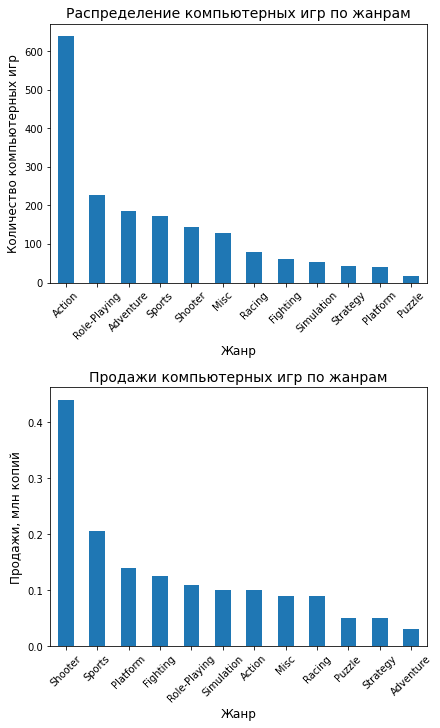

In [33]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 10), constrained_layout=True)
ax1 = data.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', rot=45, ax=ax1)
ax2 = data.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', rot=45, ax=ax2)
ax1.set_title('Распределение компьютерных игр по жанрам', fontsize=14)
ax1.set_xlabel('Жанр', fontsize=12)
ax1.set_ylabel('Количество компьютерных игр', fontsize=12)
ax2.set_title('Продажи компьютерных игр по жанрам', fontsize=14)
ax2.set_xlabel('Жанр', fontsize=12)
ax2.set_ylabel('Продажи, млн копий', fontsize=12);

**Вывод:**

Самым популярным жанром по количеству игр оказался *Action*, таких игр около 600, далее идут жанры *Role-Playing*, *Adventure*, *Sport*, *Shooter*, *Misc*, у которых от 230 до 130 игр, меньше всего игр в жанре *Puzzle*.

По медианному значению количества продаж лидируют игры в жанре *Shooter*, они стабильно приносят высокие продажи - 0,45 млн проданных копий. Игры в жанре *Action* продаются в значительно меньших количествах - 0,1 млн копий, возможно это связано с большим выбором таких игр на рынке, получается, что при том же количестве пользователей, продаж на каждую игру оказывается меньше. Довльно высокое медианное значение продаж также показывает жанр *Sports* - 0,2 млн копий.

## Портрет пользователя по регионам

### ТОП-5 платформ для пользователей каждого региона

In [34]:
def rating_per_region(data, index, ):
    stat_per_region = (
    data
    .pivot_table(index=index, values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    )
    fig, axs = plt.subplots(3, figsize=(6, 16), constrained_layout=True)
    count = 0
    for col in stat_per_region.columns:
        rating = stat_per_region[col].sort_values(ascending=False)  # рейтинг по региону
        rating.iloc[5] = rating.iloc[5:].sum()  # суммируем продажи на платформах, не вошедших в топ-5
        rating = rating.rename(index={rating.index[5]: 'Other_platforms'})[:6]  # создаем индекс 'Other_platforms' для суммы
        rating_platforms.plot(kind='pie', ax=axs[count], rot=0, autopct='%1.1f%%', fontsize=13)
        axs[count].set_ylabel('')
        axs[count].set_title(f'ТОП 5 платформ для региона {col.split("_")[0].upper()}', fontsize=14)
        count += 1;

In [35]:
platform_per_region = (
    data
    .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
platform_per_region

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.33,44.29,23.48
PC,20.04,0.00,8.42
PS3,28.62,12.00,25.41
PS4,130.04,15.02,98.61
PSV,3.58,14.61,2.63
Wii,6.48,1.05,12.11
WiiU,13.15,7.31,19.36
X360,17.93,0.21,35.03
XOne,46.25,0.32,81.27


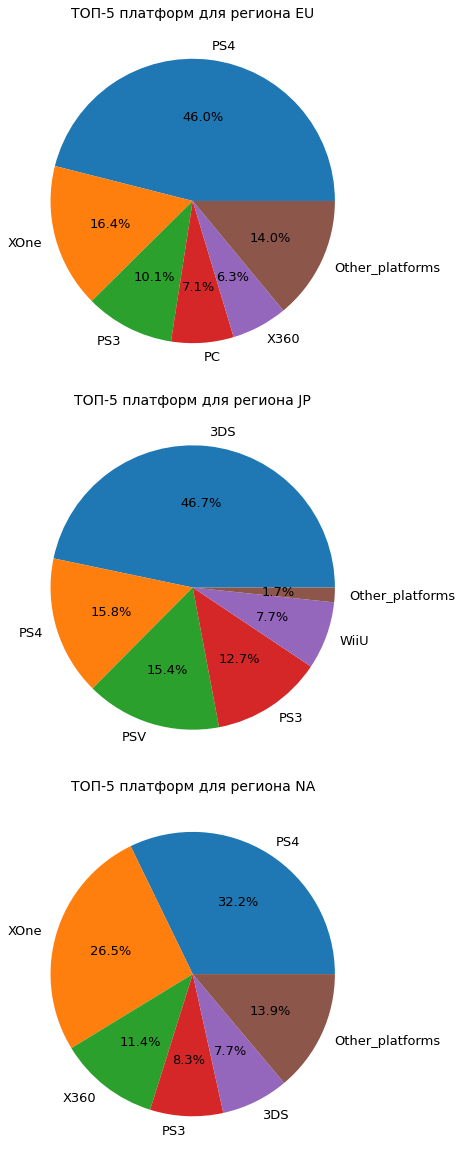

In [36]:
fig, axs = plt.subplots(3, figsize=(6, 16), constrained_layout=True)
count = 0
for col in platform_per_region.columns:
    rating_platforms = platform_per_region[col].sort_values(ascending=False)  # рейтинг платформ по одному региону
    rating_platforms.iloc[5] = rating_platforms.iloc[5:].sum()  # суммируем продажи на платформах, не вошедших в топ-5
    rating_platforms = rating_platforms.rename(index={rating_platforms.index[5]: 'Other_platforms'})[:6]  # создаем индекс 'Other_platforms' для суммы
    rating_platforms.plot(kind='pie', ax=axs[count], rot=0, autopct='%1.1f%%', fontsize=13)
    axs[count].set_ylabel('')
    axs[count].set_title(f'ТОП-5 платформ для региона {col.split("_")[0].upper()}', fontsize=14)
    count += 1;

**Вывод:**

В Европе практически половина продаж (46%) были совершены на платформе PS4. Следующая по популярности с большим отставнием платформа XOne - 16,4%. Также в топ-5 вошли PS3, PC и X360 с долей 10-6%.

В Японии большая часть продаж приходится на платформу 3DS (46,7%), на втором месте по популярности оказались PS4 - 15,8% продаж и PSV - 15,4% продаж. Также в топ 5 вошли PS3 и WiiU.

В Северной Америке наиболее популярными среди пользователей являются платформы PS4 - 32,2% всех проданных копий и XOne - 26,5% продаж. X360, PS3 и 3DS также входят в пятерку.

### ТОП-5 жанров у пользователей разных регионов

In [37]:
genre_per_region = (
    data
    .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
genre_per_region

,eu_sales,jp_sales,na_sales
genre,,,
Action,79.99,30.24,80.47
Adventure,6.49,3.57,5.82
Fighting,6.74,6.37,12.53
Misc,14.26,6.37,20.37
Platform,7.28,2.69,6.84
Puzzle,0.54,0.93,0.92
Racing,15.22,1.80,9.33
Role-Playing,28.34,31.32,33.83
Shooter,67.72,4.95,81.97


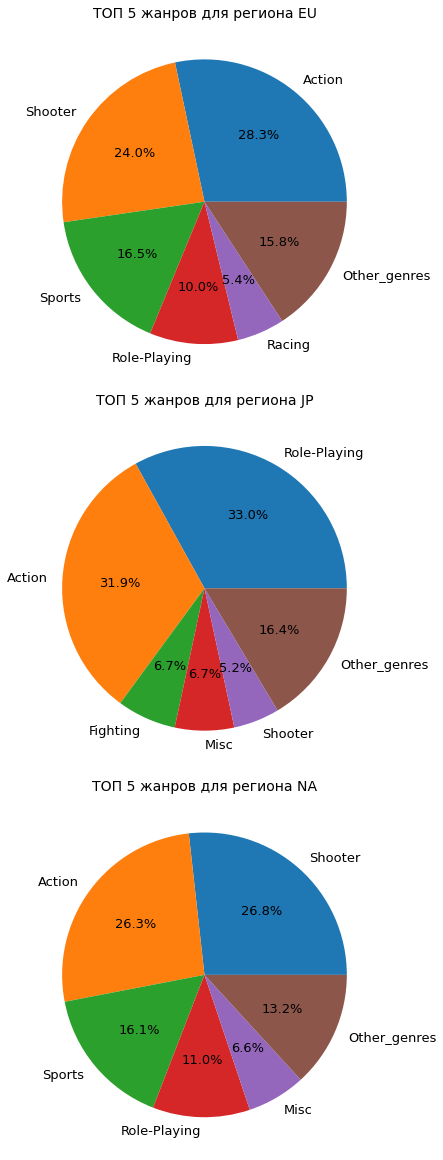

In [38]:
fig, axs = plt.subplots(3, figsize=(6, 16), constrained_layout=True)
count = 0
for col in genre_per_region.columns:
    rating_genres = genre_per_region[col].sort_values(ascending=False)
    rating_genres.iloc[5] = rating_genres.iloc[5:].sum()
    rating_genres = rating_genres.rename(index={rating_genres.index[5]: 'Other_genres'})[:6]
    rating_genres.plot(kind='pie', ax=axs[count], rot=0, autopct='%1.1f%%', fontsize=13)
    axs[count].set_ylabel('')
    axs[count].set_title(f'ТОП 5 жанров для региона {col.split("_")[0].upper()}', fontsize=14)
    count += 1;

**Вывод:**

В Европе и Северной Америке картина популярности жанров схожа. Самыми популярными жанрами являются *Action* и *Shooter* (24-28% продаж), затем идут *Sports* и *Role-Playing*. На 5 месте в Европе жанр *Racing*, в Северной Америке в свою очередь 5 место занял жанр *Misc*.

В Японии наиболее популярные жанры игр *Role-Playing* (33%) и *Action* (31,9%), далее идут *Fighting*, *Misc*, *Shooter* (7-5% продаж).

### Влияние рейтинга ESRB на продажи в различных регионах

In [39]:
rating_per_region = (
    data
    .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
rating_per_region

,eu_sales,jp_sales,na_sales
rating,,,
E,58.52,8.95,53.85
E10+,30.16,4.46,39.33
M,96.45,8.67,99.73
RP,0.05,0.00,0.00
T,37.80,14.95,47.67
no rating,59.44,57.78,65.74


Расшифровка аббревиатур рейтинга ESRB:

* `E` - Everyone (Для всех)
* `M` - Mature (От 17 лет)
* `T` - Teen (Подросткам)
* `E10+` - Everyone 10 and older (Для всех старше 10 лет)
* `RP` - Rating Pending (Рейтинг ожидается)

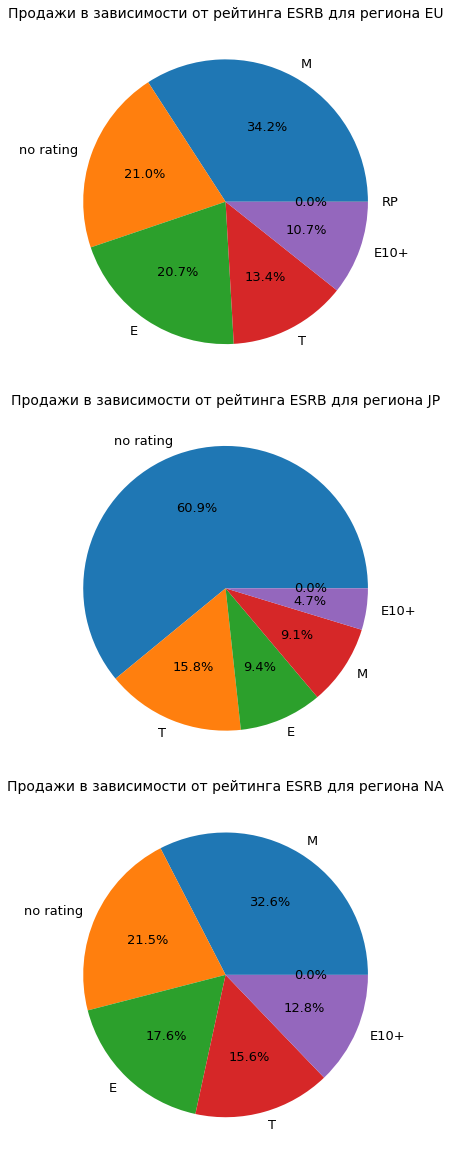

In [40]:
fig, axs = plt.subplots(3, figsize=(6, 16), constrained_layout=True)
count = 0
for col in rating_per_region.columns:
    rating = rating_per_region[col].sort_values(ascending=False)
    rating.plot(kind='pie', ax=axs[count], rot=0, autopct='%1.1f%%', fontsize=13)
    axs[count].set_ylabel('')
    axs[count].set_title(f'Продажи в зависимости от рейтинга ESRB для региона {col.split("_")[0].upper()}', fontsize=14)
    count += 1;

**Вывод:**

В Европе и Северной Америке наибольшее количество проданных игр имеют рейтинг *M* (от 17 лет) - треть от общего количества продаж. Игры без рейтинга на втором месте, их 21%. Также популярны игры с рейтингом *E* (Для всех). Игры для более младшего возраста, с рейтингом *E10+* (Для детей старше 10 лет) и *T* (Для подростков) продаются в меньшем количестве.

В Японии более 60% проданных копий не имеют рейтинг ESRB, что можно объяснить тем, что в данном регионе популярны игры, которые менее популярны в Европе и Северной Америке. Возможно у них есть рейтинг, который выставляли другие организации. Далее идут игры с рейтингом *T* с долей 15,8% и игры с рейтингом *E* и *M* с долями 9%. Игр с рейтингом *E10+* менее 5%.

## Проверка гипотез

**Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Для проверки данной гипотезы воспользуемся t-критерием Стьюдента для независимых выборок. Он позволит сравнить средние значения двух выборок между собой и сделать вывод об их равенстве или же о статистически значимом различии.

```
H_0: Средний пользовательский рейтинг Xbox One = средний пользовательский рейтинг PC
H_1: Средний пользовательский рейтинг Xbox One ≠ средний пользовательский рейтинг PC
alpha = 0.05
```

In [41]:
# сформируем две выборки: пользовательский рейтинг Xbox One и пользовательский рейтинг PC
x_one = data[(data['platform'] == 'XOne') & (~data['user_score'].isna())]['user_score']
pc = data[(data['platform'] == 'PC') & (~data['user_score'].isna())]['user_score']
len(x_one)

165

In [42]:
# проверим двустороннюю гипотезу с помощью t-теста
results = st.ttest_ind(x_one, pc, equal_var=False)

alpha = 0.05

if results.pvalue < alpha:
    print(f'p-value = {results.pvalue}')
    print('Отвергаем нулевую гипотезу')
else:
    print(f'p-value = {results.pvalue}')
    print('Не получилось отвергнуть нулевую гипотезу')

p-value = 0.196705682453495
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

По результата t-теста мы не отвергаем нулевую гипотезу. По всей видимости, пользователи ставят примерно одинаковые оценки на платформах Xbox One и PC.

**Проверка гипотезы: cредние пользовательские рейтинги жанров Action и Sports разные**

Аналогичным тестом воспользуемся и в этом случае.

```
H_0: Средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports
H_1: Средний пользовательский рейтинг жанра Action ≠ средний пользовательский рейтинг жанра Sports
alpha = 0.05
```

In [43]:
# сформируем две выборки: пользовательский рейтинг жанра Action и пользовательский рейтинг жанра Sports
action = data[(data['genre'] == 'Action') & (~data['user_score'].isna())]['user_score']
sports = data[(data['genre'] == 'Sports') & (~data['user_score'].isna())]['user_score']

In [44]:
# проверим двустороннюю гипотезу с помощью t-теста
results = st.ttest_ind(action, sports, equal_var=False)

alpha = 0.05

if results.pvalue < alpha:
    print(f'p-value = {results.pvalue}')
    print('Отвергаем нулевую гипотезу')
else:
    print(f'P-value = {results.pvalue}')
    print('Не получилось отвергнуть нудевую гипотезу')

p-value = 1.4809156680902904e-14
Отвергаем нулевую гипотезу


**Вывод:**

Жанры Action и Sports пользователи оценивают по-разному.

## Общий вывод

1. Потенциально прибыльными платформами с наибольшими продажами на 2016 год являются PS4, XOne, 3DS и WiiU.
2. Самым стабильным по количеству продаж жанром оказался *Shooter*.
3. Оценки критиков и пользователей не оказывают большого влияния на продажи
4. Предпочтения по платформам отличаются по регионам, наиболее популярна в Европе и Свереной Америке - PS4, в Японии - Nintendo 3DS.
5. В Европе и Северной Америке популярен жанры игр *Action* и *Shooter*, в Японии - *Role-Playing* и *Action*.
6. В Европе и Северной Америке наибольшее количество проданных игр имеют рейтинг *M* (от 17 лет), также популярны игры без рейтинга ESRB. В Японии больше половины проданных игр не имеют рейтинга ESRB.
7. Проверка гипотез показала, что пользователи ставят примерно одинаковые оценки на платформах Xbox One и PC. В свою очередь жанры Action и Sports пользователи оценивают по-разному.